In [122]:
import os
import csv
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import matplotlib.pyplot as plt

# ##The average commute time for transit users.
# Percentage difference between average commute times of car commuters and transit users.
# Percentage of commuters who use public transit.
# Total number of commuters who use public transit.
# The difference between the citywide median income and the median income of transit users.


In [5]:
##All csvs

commutercsv = "commutertimes1.csv"
commuterpubliccsv = "commutertimespublic.csv"
populationcsv = "population1.csv"
citiescsv = "cities1.csv"
commuting_driving = "commutingdriving.csv"

In [6]:
##Reading the csvs, changing some names of columns to match certain csvs, making the cities lower case, the "thousands = ,"makes sure that the string 1,200 is a number

commuter_df = pd.read_csv(commutercsv, thousands = ",")
commuter_public_df = pd.read_csv(commuterpubliccsv, thousands = ",")
population_df = pd.read_csv(populationcsv, thousands = ",")
cities_df = pd.read_csv(citiescsv)
commuting_driving_df = pd.read_csv(commuting_driving, thousands = ",")
new_pop_df = population_df[["NAME","STNAME","POPESTIMATE2016"]]
cities_df=cities_df.rename(columns={"City/Region": "City"})
commuter_public_df["City"]=commuter_public_df["City"].str.lower()
commuting_driving_df["City"]= commuting_driving_df["City"].str.lower()
cities_df["City"]=cities_df["City"].str.lower()
commuter_df["City"]=commuter_df["City"].str.lower()
new_pop_df["NAME"]=new_pop_df["NAME"].str.lower()
commuting_driving_df = commuting_driving_df.dropna(axis=0,how="any")



In [7]:
##This is the dataset of all cities and average commute time for driving in minutes
commuter_df.head()

,ID,Country,GeoID,City,State,Area Type,Minutes,Margin of Error
0,0100000US,United States,310M300US10100,aberdeen,SD,Micro,13.2,0.5
1,0100000US,United States,310M300US10140,aberdeen,WA,Micro,24.8,1.0
2,0100000US,United States,310M300US10180,abilene,TX,Metro,17.4,0.5
3,0100000US,United States,310M300US10220,ada,OK,Micro,17.3,0.6
4,0100000US,United States,310M300US10300,adrian,MI,Micro,26.5,0.7


In [8]:
##Populatino estimates for each city and state
new_pop_df.head()

,NAME,STNAME,POPESTIMATE2016
0,alabama,Alabama,4863300
1,abbeville city,Alabama,2603
2,adamsville city,Alabama,4360
3,addison town,Alabama,738
4,akron town,Alabama,334


In [9]:
##List of Cities of interest
cities_df.head()

,City,State
0,atlanta,GA
1,austin,TX
2,boston,MA
3,chicago,IL
4,columbus,OH


In [10]:
##Public transportation data (needs cleaning)
commuter_public_df.head()

,Name,City,State,Legacy NTD ID,NTD ID,Organization Type,NTD Reporter Type,Primary UZA Population,Agency VOMS,Mode,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,MTA New York City Transit,new york,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,18351295,11004,HR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MTA New York City Transit,new york,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,18351295,11004,MB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MTA New York City Transit,new york,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,18351295,11004,DR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTA New York City Transit,new york,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,18351295,11004,CB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MTA New York City Transit,new york,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,18351295,11004,RB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
##Creating neww columns in the cities_df 
cities_df["Average Public Transport Commute (minutes)"]= ""
cities_df["Average Individual Commute (distance)"] = ""
cities_df["Population"] = ""
cities_df["Population Served"]=""

In [13]:
##getting rid of unwanted columns
try:
    for i in range(30,47):
        del commuter_public_df[commuter_public_df.columns[i]]
except IndexError:
    pass

In [14]:
##Yes this is the same cell as before..run it
try:
    for i in range(30,47):
        del commuter_public_df[commuter_public_df.columns[i]]
except IndexError:
    pass

In [15]:
##Still getting rid of them...
del commuter_public_df["Unnamed: 33"]
del commuter_public_df["Unnamed: 37"]

In [16]:
#And...that's better
del commuter_public_df["Unnamed: 41"]
del commuter_public_df["Unnamed: 45"]

In [17]:
##Extracting from the csv, the total number of people that use car, truck or public transportation. We only want our cities of interest

list_of_df3 = []
merged_df3 = []
for index,row in cities_df.iterrows():
    ge3 = commuting_driving_df[commuting_driving_df["City"].str.contains(row["City"])]
    ga3 = ge3[ge3["State"].str.contains(row["State"])][["City","State","Mode of Transport","Total People","Margin of Error"]]
 #   print(row["State"])
    list_of_df3.append(ga3)
    
merged_df3 = pd.concat(list_of_df3)
merged_df3

,City,State,Mode of Transport,Total People,Margin of Error
49,atlanta-sandy springs-roswell,GA,"Car, truck, or van: Drove alone",34,55
50,atlanta-sandy springs-roswell,GA,Other travel mode,30,45
51,atlanta-sandy springs-roswell,GA,"Car, truck, or van: Drove alone",79,63
237,atlanta-sandy springs-roswell,GA,"Car, truck, or van: Drove alone",51,35
238,atlanta-sandy springs-roswell,GA,"Car, truck, or van: Carpooled",16,26
260,atlanta-sandy springs-roswell,GA,"Car, truck, or van: Drove alone",50,45
261,atlanta-sandy springs-roswell,GA,"Car, truck, or van: Drove alone",42,35
262,atlanta-sandy springs-roswell,GA,"Car, truck, or van: Carpooled",10,16
265,atlanta-sandy springs-roswell,GA,"Car, truck, or van: Drove alone",35,40
266,atlanta-sandy springs-roswell,GA,"Car, truck, or van: Carpooled",11,18


In [18]:
##For this data set, we are only concerned about people that are using their cars. So, we need to get rid of rows with public transport and "other travel mode"

merged_df3_drive_only=merged_df3[merged_df3["Mode of Transport"]!="Public transportation"]
merged_df3_drive_only=merged_df3_drive_only[merged_df3_drive_only["Mode of Transport"]!="Other travel mode"]

In [19]:
##Camden and Rockville are considered interchangeable due to how close they are in MD, and they both reside in Montgomery county
##sums_driving is a dctionary that counts up how many people drive to work per day, and the keys are the cities

sums_driving = {}
cities_df.set_value(10, 'City', "camden")
for index,row in cities_df.iterrows():
    sum_of_people = merged_df3_drive_only[merged_df3_drive_only["City"].str.contains(row["City"])]
    sum_of_driving_people = sum_of_people[sum_of_people["State"].str.contains(row["State"])]
    sums_driving[row["City"]]=sum_of_driving_people["Total People"].sum()

cities_df = cities_df.set_value(10,"City","rockville")


{'alexandria': 4830932,
 'atlanta': 2143375,
 'austin': 774492,
 'boston': 1912936,
 'camden': 2207525,
 'chicago': 3509505,
 'columbus': 857407,
 'dallas': 2850110,
 'denver': 1095293,
 'indianapolis': 828224,
 'los angeles': 5103600,
 'miami': 2235321,
 'nashville': 751647,
 'new york': 10578606,
 'newark': 10578606,
 'philadelphia': 2207525,
 'pittsburgh': 959786,
 'raleigh': 487275,
 'washington': 4830932}

In [20]:
##sum_driving needs to be converted into a dictionary, with an index

sum_driving_df = pd.DataFrame.from_dict(sums_driving, orient = "index")
sum_driving_df = sum_driving_df.rename(columns = {0:"Total People per year"})

In [88]:
sum_driving_df

,City,Average People per Hour
0,atlanta,244.677511
1,austin,88.412329
2,boston,218.371689
3,chicago,400.628425
4,columbus,97.877511
5,dallas,325.355023
6,denver,125.033447
7,indianapolis,94.546119
8,los angeles,582.602740
9,miami,255.173630


In [21]:
##Making sure the cities are not the index, but an actual index
sum_driving_df.reset_index(level=0, inplace=True)

In [22]:
sum_driving_df = sum_driving_df.rename(columns = {"index":"City"})

In [23]:
sum_driving_df.set_value(10,"City","rockville")

,City,Total People per year
0,atlanta,2143375
1,austin,774492
2,boston,1912936
3,chicago,3509505
4,columbus,857407
5,dallas,2850110
6,denver,1095293
7,indianapolis,828224
8,los angeles,5103600
9,miami,2235321


In [24]:
##Adding another row, the future data sets have "passengers per hour" so this makes it consistent
sum_driving_df["Average People per Hour"] = (sum_driving_df["Total People per year"]/365)/24

In [25]:
#We no longer need this column
del sum_driving_df["Total People per year"]

In [26]:
##Tranporation mode symbols
##Mode Symbol:
##CB: Commuter Bus
##DR: Demand Response
##HR: Heavy Rail
##FB: Ferryboat
##MB: Bus
##CB: Commuter Bus
##DT: Demand Response Taxi (how NY has none of this..)
##CR: Commuter Rail
##VP: Vanpool
##LR: Light Rail
##SR: Streetcar Rail
##TB: Trolleybus
##RB: Bus Rapid Transit
##MG: Monorail/Automated Guideway
##YR: Hybrid Rail


In [27]:
##Extracting the data we need from the commuter public tranport data
list_of_df = []
for index,row in cities_df.iterrows():
    ge = commuter_public_df[commuter_public_df["City"]==row["City"]]
    ga = ge[ge["State"].str.contains(row["State"])][["City","State","Mode","Average Speed (mi/hr)","Passengers per Hour","Average Passenger Trip Length (mi)","Directional Route Miles"]]
    list_of_df.append(ga)


In [28]:
##Combining the data frame into one
merged_df = pd.concat(list_of_df)
merged_df

,City,State,Mode,Average Speed (mi/hr),Passengers per Hour,Average Passenger Trip Length (mi),Directional Route Miles
110,atlanta,GA,MB,12.33,29.75,4.25,1672.2
111,atlanta,GA,HR,26.56,85.81,6.63,96.1
112,atlanta,GA,DR,15.40,1.58,10.91,0.0
113,atlanta,GA,DR,17.47,1.71,13.16,0.0
314,atlanta,GA,VP,42.11,6.87,41.16,0.0
590,atlanta,GA,CB,25.57,15.00,25.19,270.4
1064,atlanta,GA,VP,51.14,4.70,62.38,0.0
3372,atlanta,GA,SR,4.83,52.42,0.84,2.7
146,austin,TX,MB,11.85,23.39,4.07,1084.8
147,austin,TX,VP,35.87,4.99,34.13,0.0


In [29]:
##Changing data types to floats so that calculations can be made
merged_df["Average Speed (mi/hr)"] = merged_df["Average Speed (mi/hr)"].astype(float)

In [30]:
##This is a pain, but we need this to get rid of the rows that have a -  in the cell
##YOU NEED THIS PART
part1 = ~merged_df["Average Passenger Trip Length (mi)"].str.contains("-")


In [31]:
##Concating the true false
list2 = [merged_df,part1]
merged_df1 = pd.concat(list2)
merged_df["This"] = part1

In [32]:
merged_df2 = merged_df[merged_df["This"]==True]

In [33]:
del merged_df2["This"]

In [34]:
merged_df2

,City,State,Mode,Average Speed (mi/hr),Passengers per Hour,Average Passenger Trip Length (mi),Directional Route Miles
110,atlanta,GA,MB,12.33,29.75,4.25,1672.2
111,atlanta,GA,HR,26.56,85.81,6.63,96.1
112,atlanta,GA,DR,15.40,1.58,10.91,0.0
113,atlanta,GA,DR,17.47,1.71,13.16,0.0
314,atlanta,GA,VP,42.11,6.87,41.16,0.0
590,atlanta,GA,CB,25.57,15.00,25.19,270.4
1064,atlanta,GA,VP,51.14,4.70,62.38,0.0
3372,atlanta,GA,SR,4.83,52.42,0.84,2.7
146,austin,TX,MB,11.85,23.39,4.07,1084.8
147,austin,TX,VP,35.87,4.99,34.13,0.0


In [35]:
##Setting more data types for calcuations
merged_df2[["Average Passenger Trip Length (mi)","Average Speed (mi/hr)"]] = merged_df2[["Average Passenger Trip Length (mi)","Average Speed (mi/hr)"]].astype(float)

In [36]:
##Calculating the average trip length

merged_df2['Average Trip Time'] = (merged_df2["Average Passenger Trip Length (mi)"]/merged_df2["Average Speed (mi/hr)"])*60

In [37]:

##Mode Symbol:
##CB: Commuter Bus
##DR: Demand Response
##HR: Heavy Rail
##FB: Ferryboat
##MB: Bus
##CB: Commuter Bus
##DT: Demand Response Taxi (how NY has none of this..)
##CR: Commuter Rail
##VP: Vanpool
##LR: Light Rail
##SR: Streetcar Rail
##TB: Trolleybus
##RB: Bus Rapid Transit
##MG: Monorail/Automated Guideway
##YR: Hybrid Rail

##because new york sucks...
merged_df2 = merged_df2.set_value(1395, 'Passengers per Hour', 1165.53)

In [38]:
##You need this too
##Setting mroe data types for calculations

merged_df2["Passengers per Hour"] = merged_df2["Passengers per Hour"].astype(float)


In [39]:
# d1["Passengers per Hour"] = d1["Passengers per Hour"].astype(float)
# sum1 = d1["Passengers per Hour"].sum()

# d1["Percentage of Passengers utilized"] = d1["Passengers per Hour"]/sum1

# d1["weighted"] = d1["Percentage of Passengers utilized"]*d1["Average Trip Time"] 

# weighted_score = d1["weighted"].sum()

# d1

list_of_df1 = []

###Doing the commuter driving concatanation

for index,row in cities_df.iterrows():
    ge1 = commuter_df[commuter_df["City"].str.contains(row["City"])]
    ga1 = ge1[ge1["State"].str.contains(row["State"])][["City","State","Minutes"]]
    list_of_df1.append(ga1)

commmuting_merged_df = pd.concat(list_of_df1)

commmuting_merged_df
##Droppinng rows we do not need
commmuting_merged_df=commmuting_merged_df.drop(105)
commmuting_merged_df=commmuting_merged_df.drop(168)
commmuting_merged_df=commmuting_merged_df.drop(220)
commmuting_merged_df=commmuting_merged_df.drop(510)
commmuting_merged_df=commmuting_merged_df.drop(563)
commmuting_merged_df=commmuting_merged_df.drop(624)
commmuting_merged_df=commmuting_merged_df.drop(686)
# commmuting_merged_df=commmuting_merged_df.drop(921)


##Setting the cities equal to the correct string, so that they can be combined later

for index,row in cities_df.iterrows():
    for index3,row3 in commmuting_merged_df.iterrows():
        if commmuting_merged_df["City"].str.contains(row["City"])[index3]:
            commmuting_merged_df.set_value(index3,"City",row["City"])

In [41]:
##These got mixed up for some reason...probably because they are in the same area and have the same value
commmuting_merged_df.set_value(921,"City","washington")
commmuting_merged_df.set_value(923,"State","VA")

#commmuting_merged_df["City"].str.contains(row["City"])[index3]
#cities_df

,City,State,Minutes
46,atlanta,GA,31.0
55,austin,TX,26.4
106,boston,MA,32.0
167,chicago,IL,31.3
197,columbus,OH,23.5
219,dallas,TX,27.8
237,denver,CO,27.3
411,indianapolis,IN,24.8
512,los angeles,CA,30.4
565,miami,FL,30.6


In [48]:
commmuting_merged_df

,City,State,Minutes
46,atlanta,GA,31.0
55,austin,TX,26.4
106,boston,MA,32.0
167,chicago,IL,31.3
197,columbus,OH,23.5
219,dallas,TX,27.8
237,denver,CO,27.3
411,indianapolis,IN,24.8
512,los angeles,CA,30.4
565,miami,FL,30.6


In [49]:
##Doing a merge for average number of people driving per hour (sum_driving)
##And the main dataframe (merged_df2) ##The values will be repeated in merged_df7
merged_df7 = pd.merge(sum_driving_df,merged_df2,how="right")

##Do Another merge of that merge, and the average commuting time, again, values will be repeated
merged_df9 = pd.merge(merged_df7,commmuting_merged_df, on="City",how="right")

##This is testing for the For loop
# merged_df9[merged_df9["City"]=="atlanta"]["Minutes"][0]
# merged_df9[merged_df9["City"]=="atlanta"]["Average People per Hour"][0]

merged_df9

,City,Average People per Hour,State_x,Mode,Average Speed (mi/hr),Passengers per Hour,Average Passenger Trip Length (mi),Directional Route Miles,Average Trip Time,State_y,Minutes
0,atlanta,244.677511,GA,MB,12.33,29.75,4.25,1672.2,20.681265,GA,31.0
1,atlanta,244.677511,GA,HR,26.56,85.81,6.63,96.1,14.977410,GA,31.0
2,atlanta,244.677511,GA,DR,15.40,1.58,10.91,0.0,42.506494,GA,31.0
3,atlanta,244.677511,GA,DR,17.47,1.71,13.16,0.0,45.197481,GA,31.0
4,atlanta,244.677511,GA,VP,42.11,6.87,41.16,0.0,58.646402,GA,31.0
5,atlanta,244.677511,GA,CB,25.57,15.00,25.19,270.4,59.108330,GA,31.0
6,atlanta,244.677511,GA,VP,51.14,4.70,62.38,0.0,73.187329,GA,31.0
7,atlanta,244.677511,GA,SR,4.83,52.42,0.84,2.7,10.434783,GA,31.0
8,austin,88.412329,TX,MB,11.85,23.39,4.07,1084.8,20.607595,TX,26.4
9,austin,88.412329,TX,VP,35.87,4.99,34.13,0.0,57.089490,TX,26.4


In [50]:
##We do not need this column
del merged_df9["State_y"]

In [53]:
##This got a lot more complicated, this creates a two dictionaries of weights. The first one considers just public transportation. The second one incorporates commmuting driving as a factor
##The reason why it is separated is because it is apparant that most people drive to work. So the commuting driving heavily affects the overall score. 
weighted_scores_with_drive = {}
weighted_scores_without_drive_dict = {}
list_of_weighteddf = []
for index1,row1 in cities_df.iterrows():
    for index2,row2 in merged_df2.iterrows():
        d1 = merged_df2[merged_df2["City"]==row1["City"]]
        d2 = merged_df2[merged_df2["City"]==row1["City"]]
        sum2 = d2["Passengers per Hour"].sum()
        sum1 = d1["Passengers per Hour"].sum()+merged_df9[merged_df9["City"]==row1["City"]]["Average People per Hour"][merged_df9.index[merged_df9["City"]==row1["City"]][0]]
        d2["Percentage of Passengers utilized"] = d2["Passengers per Hour"]/sum2
        d1["Percentage of Passengers utilized"] = d1["Passengers per Hour"]/sum1
        d2["weighted"] = d2["Percentage of Passengers utilized"]*d2["Average Trip Time"]
        d1.set_value(index2+1,"Percentage of Passengers utilized",merged_df9[merged_df9["City"]==row1["City"]]["Average People per Hour"][merged_df9.index[merged_df9["City"]==row1["City"]][0]]/sum1)
        d1["weighted"] = d1["Percentage of Passengers utilized"]*d1["Average Trip Time"]
        d1.set_value(index2+1,"weighted", merged_df9[merged_df9["City"]==row1["City"]]["Average People per Hour"][merged_df9.index[merged_df9["City"]==row1["City"]][0]]/sum1*merged_df9[merged_df9["City"]==row1["City"]]["Minutes"][merged_df9.index[merged_df9["City"]==row1["City"]][0]])
        weighted_score_with_drive = d1["weighted"].sum()
        weighted_score_wo_drive = d2["weighted"].sum()
        weighted_scores_with_drive[row1["City"]] = weighted_score_with_drive
        weighted_scores_without_drive_dict[row1["City"]]= weighted_score_wo_drive
        list_of_weighteddf.append(d1)


In [ ]:
##More Testing for the for loop
#merged_df9.index[merged_df9["City"]=="chicago"][0]


#merged_df9[merged_df9["City"]==row1["City"]]["Average People per Hour"][merged_df9.index[merged_df9["City"]==row1["City"]][0]]
#index2.dtype
#merged_df9[merged_df9["City"]==row1["City"]]["Average People per Hour"][merged_df9.index[merged_df9["City"]==row1["City"]][0]]/sum1
#merged_df9[merged_df9["City"]==row1["City"]]["Average People per Hour"]

#merged_df9[merged_df9["City"]==row1["City"]]["Average People per Hour"][merged_df9.index[merged_df9["City"]==row1["City"]][0]]/sum1*merged_df9[merged_df9["City"]==row1["City"]]["Minutes"][merged_df9.index[merged_df9["City"]==row1["City"]][0]]

In [54]:
weighted_scores_with_drive

{'alexandria': 36.48303954956693,
 'atlanta': 26.689175339020807,
 'austin': 33.033972738811045,
 'boston': 24.47018951688783,
 'chicago': 30.058118822448613,
 'columbus': 24.55312216155005,
 'dallas': 28.254638253743792,
 'denver': 26.79359451892987,
 'indianapolis': 24.28920990648313,
 'los angeles': 26.692047319115282,
 'miami': 25.566191695281486,
 'nashville': 33.520134553976156,
 'new york': 30.64052599570794,
 'newark': 30.092175069311324,
 'philadelphia': 24.00981086106867,
 'pittsburgh': 17.166834197877012,
 'raleigh': 20.151047718865293,
 'rockville': 33.04361892625478,
 'washington': 29.697949825493055}

In [55]:
weighted_scores_without_drive_dict

{'alexandria': 50.20433495432511,
 'atlanta': 21.35778709500006,
 'austin': 38.28157924159262,
 'boston': 21.374400390113678,
 'chicago': 26.851125785357873,
 'columbus': 28.64023462741277,
 'dallas': 29.028636680967267,
 'denver': 26.370065267255523,
 'indianapolis': 21.803712180111916,
 'los angeles': 22.230721081748168,
 'miami': 18.77171860071003,
 'nashville': 38.67404125805223,
 'new york': 26.481222300518358,
 'newark': 22.340253057725,
 'philadelphia': 18.21894742117664,
 'pittsburgh': 11.847798106079916,
 'raleigh': 15.981792105012396,
 'rockville': 16.782884310618066,
 'washington': 14.936926176679231}

In [58]:
merged_df_rank_with_drive = pd.DataFrame.from_dict(weighted_scores_with_drive, orient = "index")


merged_df_rank_with_drive = merged_df_rank_with_drive.rename(columns={0: 'Score with Driving'})
merged_df_rank_with_drive.reset_index(level=0, inplace=True)
merged_df_rank_with_drive = merged_df_rank_with_drive.rename(columns = {"index":"City"})

merged_df_rank_with_drive.sort_values("Score with Driving")

,City,Score with Driving
16,pittsburgh,17.166834
17,raleigh,20.151048
15,philadelphia,24.009811
7,indianapolis,24.289210
2,boston,24.470190
4,columbus,24.553122
9,miami,25.566192
0,atlanta,26.689175
8,los angeles,26.692047
6,denver,26.793595


In [60]:
merged_df_rank_wo_drive = pd.DataFrame.from_dict(weighted_scores_without_drive_dict, orient = "index")

merged_df_rank_wo_drive = merged_df_rank_wo_drive.rename(columns={0: 'Score without Driving'})
merged_df_rank_wo_drive.reset_index(level=0, inplace=True)
merged_df_rank_wo_drive = merged_df_rank_wo_drive.rename(columns = {"index":"City"})

merged_df_rank_wo_drive.sort_values("Score without Driving")

,City,Score without Driving
16,pittsburgh,11.847798
18,washington,14.936926
17,raleigh,15.981792
10,rockville,16.782884
15,philadelphia,18.218947
9,miami,18.771719
0,atlanta,21.357787
2,boston,21.374400
7,indianapolis,21.803712
8,los angeles,22.230721


In [65]:
merged_df_rank_with_drive_max = max(merged_df_rank_with_drive["Score with Driving"])
merged_df_rank_with_drive_min = min(merged_df_rank_with_drive["Score with Driving"])
merged_df_rank_with_drive_range = merged_df_rank_with_drive_max-merged_df_rank_with_drive_min
merged_df_rank_with_drive["Degree_score"]=1.0

In [70]:
for index,row in merged_df_rank_with_drive.iterrows():
    score = abs((row["Score with Driving"]-merged_df_rank_with_drive_max)/merged_df_rank_with_drive_range*-10)
    score = round(score,1)
    merged_df_rank_with_drive.set_value(index,"Degree_score",score)

In [72]:
merged_df_rank_with_drive.sort_values("Degree_score",ascending=False)

,City,Score with Driving,Degree_score
16,pittsburgh,17.166834,10.0
17,raleigh,20.151048,8.5
15,philadelphia,24.009811,6.5
7,indianapolis,24.289210,6.3
2,boston,24.470190,6.2
4,columbus,24.553122,6.2
9,miami,25.566192,5.7
8,los angeles,26.692047,5.1
0,atlanta,26.689175,5.1
6,denver,26.793595,5.0


In [85]:
for index,row in merged_df_rank_with_drive.iterrows():
    city = row["City"]
    state = cities_df[cities_df["City"]==city]["State"][cities_df.index[cities_df["City"]==city][0]]
    merged_df_rank_with_drive.set_value(index,"State",state)

In [86]:
merged_df_rank_with_drive

,City,Score with Driving,Degree_score,State
0,atlanta,26.689175,5.1,GA
1,austin,33.033973,1.8,TX
2,boston,24.470190,6.2,MA
3,chicago,30.058119,3.3,IL
4,columbus,24.553122,6.2,OH
5,dallas,28.254638,4.3,TX
6,denver,26.793595,5.0,CO
7,indianapolis,24.289210,6.3,IN
8,los angeles,26.692047,5.1,CA
9,miami,25.566192,5.7,FL


In [87]:
# cities_df[cities_df["City"]==city]["State"][cities_df.index[cities_df["City"]==city][0]]

In [96]:
merged_df2

,City,State,Mode,Average Speed (mi/hr),Passengers per Hour,Average Passenger Trip Length (mi),Directional Route Miles,Average Trip Time
110,atlanta,GA,MB,12.33,29.75,4.25,1672.2,20.681265
111,atlanta,GA,HR,26.56,85.81,6.63,96.1,14.977410
112,atlanta,GA,DR,15.40,1.58,10.91,0.0,42.506494
113,atlanta,GA,DR,17.47,1.71,13.16,0.0,45.197481
314,atlanta,GA,VP,42.11,6.87,41.16,0.0,58.646402
590,atlanta,GA,CB,25.57,15.00,25.19,270.4,59.108330
1064,atlanta,GA,VP,51.14,4.70,62.38,0.0,73.187329
3372,atlanta,GA,SR,4.83,52.42,0.84,2.7,10.434783
146,austin,TX,MB,11.85,23.39,4.07,1084.8,20.607595
147,austin,TX,VP,35.87,4.99,34.13,0.0,57.089490


In [103]:
#merged_df2[merged_df["City"]=="atlanta"]["Average Trip Time"].mean()

110     20.681265
111     14.977410
112     42.506494
113     45.197481
314     58.646402
590     59.108330
1064    73.187329
3372    10.434783
Name: Average Trip Time, dtype: float64

In [108]:
sum2 = merged_df2[merged_df2["City"]=="chicago"]["Passengers per Hour"].sum()

In [110]:
merged_df2[merged_df2["City"]=="chicago"]["Average Trip Time"][31]*

31     16.189427
32     20.278862
108    44.078818
Name: Average Trip Time, dtype: float64

,City,State,Mode,Average Speed (mi/hr),Passengers per Hour,Average Passenger Trip Length (mi),Directional Route Miles,Average Trip Time
31,chicago,IL,MB,9.08,44.98,2.45,1538.3,16.189427
32,chicago,IL,HR,17.93,59.59,6.06,207.8,20.278862
108,chicago,IL,CR,30.45,50.57,22.37,975.0,44.078818


In [109]:
sum2

155.14

In [115]:
d2["weighted"].sum()

14.936926176679231

In [117]:
d2["Average Trip Time"].mean()

24.579490609604296

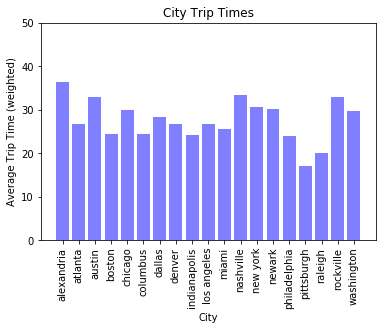

In [125]:


plt.bar(merged_df_rank_with_drive['City'], merged_df_rank_with_drive['Score with Driving'], color='b', alpha=0.5, align="center")

# Sets the y limits of the current chart
plt.ylim(0,50)

# Give our chart some labels and a tile
plt.title("City Trip Times")
plt.xlabel("City")
plt.ylabel("Average Trip Time (weighted)")
plt.xticks(rotation=90)
# Print our chart to the screen
plt.show()

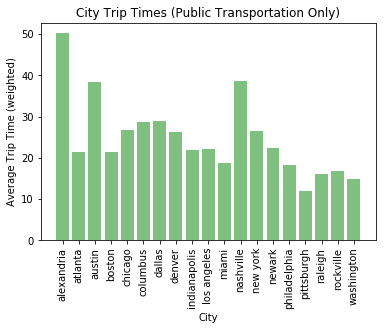

In [124]:
plt.bar(merged_df_rank_with_drive['City'], merged_df_rank_wo_drive['Score without Driving'], color='g', alpha=0.5, align="center")

# Sets the y limits of the current chart
#plt.ylim(0,5)

# Give our chart some labels and a tile
plt.title("City Trip Times (Public Transportation Only)")
plt.xlabel("City")
plt.ylabel("Average Trip Time (weighted)")
plt.xticks(rotation=90)
# Print our chart to the screen
plt.show()